In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import chi2
from scipy.special import psi
from math import log

from scipy.stats import gamma
from scipy.stats import lognorm
from fitter import Fitter

In [2]:
data_ff = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/florestal/20m/FF_20170112_20m_patches.csv')
data_fs = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/savanica/20m/FS_20170112_20m_patches.csv')
data_fc = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/campestre/20m/FC_20170112_20m_patches.csv')

In [18]:
dprvi_patches = data_ff.filter(regex='^dprvi_patch', axis=1)
prvi_patches = data_fs.filter(regex='^prvi_patch', axis=1)
dpsvi_patches = data_fc.filter(regex='^dpsvi_patch', axis=1)
dpsvim_patches = data_ff.filter(regex='^dpsvim_patch', axis=1)
rvi_patches = data_fs.filter(regex='^rvi_patch', axis=1)

In [ ]:
dprvi_patches

In [ ]:
index_dict = {'dprvi': dprvi_patches, 'prvi': prvi_patches, 'dpsvi': dpsvi_patches, 'dpsvim': dpsvim_patches, 'rvi': rvi_patches}

In [ ]:
data = {}

for index, df in index_dict.items():

    for column in df.columns:
        samples = df[column]
        shape,_,scale = lognorm.fit(samples)

        shape_col = f'{index}_shape'
        scale_col = f'{index}_scale'

        if shape_col not in data:
            data[shape_col] = []

        if scale_col not in data:
            data[scale_col] = []

        data[shape_col].append(shape)
        data[scale_col].append(scale)

result = pd.DataFrame(data)

In [ ]:
result

In [47]:
data_0 = data_ff['dprvi_patch_7']
data_1 = data_fs['prvi_patch_1']
data_2 = data_fc['dpsvi_patch_7']
data_3 = data_ff['dpsvim_patch_7']
data_4 = data_fs['rvi_patch_7']

In [48]:
[shape_0, loc_0, scale_0] = lognorm.fit(data_0)
[shape_1, loc_1, scale_1] = lognorm.fit(data_1)
[shape_2, loc_2, scale_2] = lognorm.fit(data_2)
[shape_3, loc_3, scale_3] = lognorm.fit(data_3)
[shape_4, loc_4, scale_4] = lognorm.fit(data_4)
#[shape_q, loc_q, scale_q] = lognorm.fit(data_q)

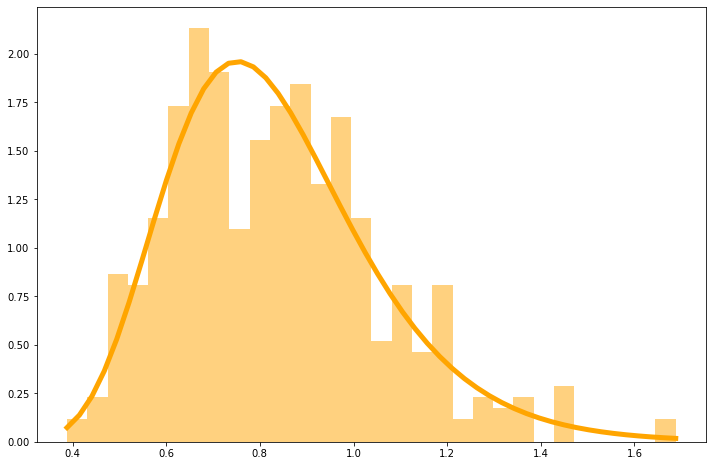

In [54]:
plt.figure(figsize=(12,8))

x = np.linspace(np.min(data_4), np.max(data_4))

plt.hist(data_4, bins=30, density=True, alpha=0.5, color='orange')
plt.plot(x, lognorm.pdf(x, shape_4, loc_4, scale_4), 'orange', linewidth=5)

In [ ]:
mu_p = log(scale_p)
mu_q = log(scale_q)
#sigma_p = shape_p
#sigma_q = shape_q
var_p = np.power(shape_p, 2)
var_q = np.power(shape_q, 2)

m = data_p.count()
n = data_q.count()

# Kullback-Leibler distances (simmetrized)
dskl_ln = (var_p * np.power((mu_p - mu_q), 2) + var_q * np.power((mu_q - mu_p), 2) + np.power((var_p - var_q), 2)) / (4 * var_p * var_q)

s = ((2*m*n) / (m + n)) * dskl_ln # statistic

p_value = chi2.sf(s, df=2)

if p_value <= 0.05:
    print('Reject H0') # Reject H0
    
if p_value > 0.05:
    print('Accept H0') # Accept H0

In [ ]:
# kp = a_p
# kq = a_q
# thetap = scale_p
# thetaq = scale_q

# dskl_ln = ((mup - muq)^2)/(2 * (sigma_p^2) * (sigma_q^2))

# dskl_g = ((kp - kq) * (psi(kp) + log(thetap) - psi(kq) - log(thetaq)) + ((kp*thetap - kq*thetaq) * ((thetap - thetaq) / (thetap * thetaq)))) / 2

# m = data_p.count()
# n = data_q.count()
# v = 1

# s = ((2*m*n*v) / (m + n)) * dskl_kn
 
# p_value = chi2.sf(s, df=2)

# if p_value <= 0.05:
#     print('Reject H0')

In [ ]:
from scipy.stats import lognorm
import pandas as pd
import os

In [ ]:
files_path = 'D:/thesis_data/VEG_INDICES/samples/stratified/florestal/20m/'

files_list = os.listdir(files_path)

In [ ]:
for index, file in enumerate(files_list):
    
    samples = pd.read_csv(files_path + file)

    dprvi_patches = samples.filter(regex='^dprvi_patch', axis=1)
    prvi_patches = samples.filter(regex='^prvi_patch', axis=1)
    dpsvi_patches = samples.filter(regex='^dpsvi_patch', axis=1)
    dpsvim_patches = samples.filter(regex='^dpsvim_patch', axis=1)
    rvi_patches = samples.filter(regex='^rvi_patch', axis=1)

    date = files_list[index].split('_')[1]

    print(date)

In [99]:
ff_dataset = 'D:/thesis_data/VEG_INDICES/lognorm_params/florestal/FF_20200917_ln_params.csv'
fs_dataset = 'D:/thesis_data/VEG_INDICES/lognorm_params/savanica/FS_20200917_ln_params.csv'
fc_dataset = 'D:/thesis_data/VEG_INDICES/lognorm_params/campestre/FC_20200917_ln_params.csv'

In [100]:
ff_df = pd.read_csv(ff_dataset)
fs_df = pd.read_csv(fs_dataset)
fc_df = pd.read_csv(fc_dataset)

In [169]:
matrix_shape = [len(ff_df.index), len(ff_df.index)]

matrix = np.zeros(matrix_shape)

for i in fs_df.index:
    for j in fc_df.index:
        
        mu_p = log(ff_df.dprvi_scale[i])
        mu_q = log(ff_df.dprvi_scale[j])

        var_p = np.power(ff_df.dprvi_shape[i], 2)
        var_q = np.power(ff_df.dprvi_shape[j], 2)

        m = 400
        n = 400

        # Kullback-Leibler distances (simmetrized)
        dskl_ln = (var_p * np.power((mu_p - mu_q), 2) + var_q * np.power((mu_q - mu_p), 2) + np.power((var_p - var_q), 2)) / (4 * var_p * var_q)

        s = ((2*m*n) / (m + n)) * dskl_ln # statistic

        p_value = chi2.sf(s, df=2)

        if p_value <= 0.05:
            matrix[i, j] = 1
            
        if p_value > 0.05:
            matrix[i, j] = 0
            
rate = (matrix.sum() / (50*50)) * 100
print(rate)

97.6


In [241]:
class1_path = 'D:/thesis_data/VEG_INDICES/lognorm_params/savanica/'
class2_path = 'D:/thesis_data/VEG_INDICES/lognorm_params/campestre/'

data = {}

index_list = ['dprvi', 'prvi','dpsvi', 'dpsvim', 'rvi']

for id, _ in enumerate(os.listdir(class1_path)):

    class1_df = pd.read_csv(class1_path + os.listdir(class1_path)[id])
    class2_df = pd.read_csv(class2_path + os.listdir(class2_path)[id])
    
    for index in index_list:
        
        class1_shape = class1_df.filter(regex=f'^{index}_shape', axis=1).values
        class1_scale = class1_df.filter(regex=f'^{index}_scale', axis=1).values

        class2_shape = class2_df.filter(regex=f'^{index}_shape', axis=1).values
        class2_scale = class2_df.filter(regex=f'^{index}_scale', axis=1).values

        matrix = np.zeros([len(class1_shape), len(class2_shape)])

        if index not in data:
            data[index] = []

        for i in class1_df.index:
            for j in class2_df.index:

                mu_p = log(class1_scale[i])
                mu_q = log(class2_scale[j])

                var_p = np.power(class1_shape[i], 2)
                var_q = np.power(class2_shape[j], 2)

                m = 400
                n = 400

                # Kullback-Leibler distances (simmetrized)
                dskl_ln = (var_p * np.power((mu_p - mu_q), 2) + var_q * np.power((mu_q - mu_p), 2) + np.power((var_p - var_q), 2)) / (4 * var_p * var_q)

                s = ((2*m*n) / (m + n)) * dskl_ln # statistic

                p_value = chi2.sf(s, df=2)

                if p_value <= 0.05:
                    matrix[i, j] = 1
                    
                if p_value > 0.05:
                    matrix[i, j] = 0
        
        rate = matrix.sum() / (len(df.index) * len(df.index))
    
        data[index].append(rate)
        
result = pd.DataFrame(data)

In [242]:
result.head(50)

,dprvi,prvi,dpsvi,dpsvim,rvi
0,0.9976,0.9572,0.9676,0.9868,0.9820
1,0.9996,0.9228,0.9596,0.9728,0.9900
2,0.9984,0.9412,0.9668,0.9860,0.9820
3,0.9984,0.9228,0.9468,0.9828,0.9896
4,0.9996,0.9180,0.9488,0.9664,0.9908
5,0.9996,0.9364,0.9524,0.9936,0.9784
6,0.9980,0.9472,0.9624,0.9932,0.9828
7,0.9996,0.9272,0.9520,0.9800,0.9828
8,0.9964,0.9544,0.9676,0.9892,0.9872
9,0.9984,0.9352,0.9580,0.9792,0.9856


In [243]:
output_path = 'D:/thesis_data/VEG_INDICES/rates/'

result.to_csv(output_path + 'FS_FC_rates.csv', sep=',', index=False)